In [1]:
import gym
from gym.wrappers import RecordEpisodeStatistics
import os
from Algorithms import *
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Health_Env
from Health_Env import *

In [2]:
env = gym.make('HealthcareEnv-v0')

In [3]:
def conv(a, win=100):
    return np.convolve(a, np.ones(win), mode='same') / win

In [7]:
# Hyperparameters
learning_rate = 0.01
episodes = 100
epsilon = 1.0
epsilon_decay = epsilon / (episodes / 2)  # reduce exploration over time
final_epsilon = 0.1
gamma = 0.95

## Q-learning Agent

In [5]:
agent = HealthQLearnVFA(env, learning_rate, epsilon, epsilon_decay, final_epsilon, gamma)

In [6]:
nenv = RecordEpisodeStatistics(env, deque_size=episodes)

In [ ]:
budget_queue = []
for episode in tqdm(range(episodes)):
    observation, info = nenv.reset()
    done = False
    while not done:
        action = agent.policy(observation)
        s_prime, reward, terminated, truncated, info = nenv.step(action = action)
        agent.update(observation, action, reward, s_prime)
        done = terminated or truncated
        observation = s_prime
    agent.decay_epsilon()
    budget_queue.append(reward)

In [15]:
def plt_results_(env, agent_, w):
    sns.set_theme(style="whitegrid")
    rewards = conv(np.array(env.return_queue).flatten(), win=w)
    lengths = conv(np.array(env.length_queue).flatten(), win=w)
    error = conv(np.array(agent_.training_error).flatten(), win=w)

    fig, ax = plt.subplots(figsize=(12, 4), ncols=3)
    sns.lineplot(x=range(len(rewards)), y=rewards, ax=ax[0], color='blue', linewidth=.4)
    ax[0].set_title('Reward (Average)')
    sns.lineplot(x=range(len(lengths)), y=lengths, ax=ax[1], color='blue', linewidth=.4)
    ax[1].set_title('Episode Length')
    sns.lineplot(x=range(len(error)), y=error, ax=ax[2], color='blue', linewidth=.2)
    ax[2].set_title('Error')
    for axis in ax:
        axis.tick_params(axis='x', labelsize=8)
        axis.tick_params(axis='y', labelsize=8)
    plt.tight_layout()
    plt.show()

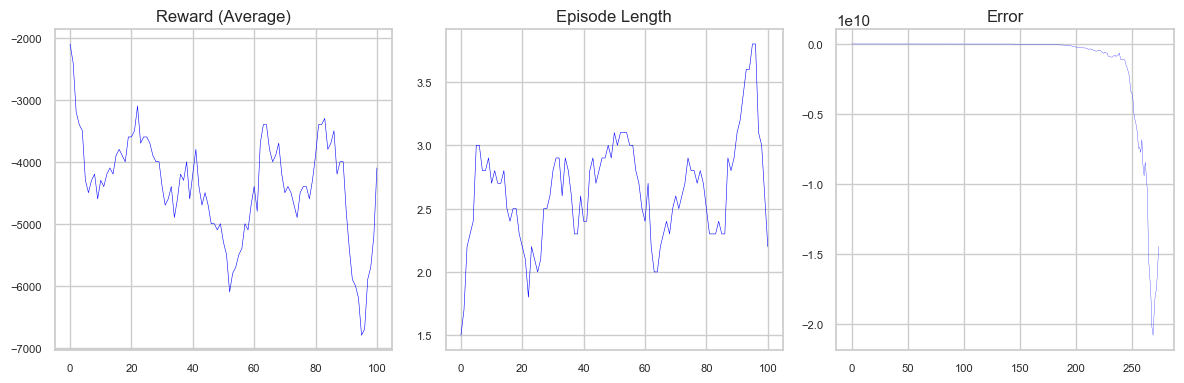

In [16]:
plt_results_(nenv, agent, 10)